In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy.spatial.distance as ssd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

mpl.rcParams["lines.markeredgewidth"] = 0.0
mpl.rcParams['text.usetex'] = False

In [3]:
n_perms = 10
D = 3
n = 1
c = 1.0

setting1_N = 1e6
setting1_L_s = [(1,1), (0.5,0.5), (0.25,0.25), (0.125,0.125)]
setting2_N = 8e6
setting2_L_s = [(2,1), (1.0, 0.5), (0.5, 0.25), (0.25, 0.125)]
setting3_N = 2.7e7
setting3_L_s = [(3,1), (1.5, 0.5), (0.75, 0.25), (0.375, 0.125)]
setting4_N = 1e6
setting4_L_s = [(2,1), (1.0, 0.5), (0.5, 0.25), (0.25, 0.125)]
setting5_N = 2e6
setting5_L_s = [(2,1), (1.0, 0.5), (0.5, 0.25), (0.25, 0.125)]
setting6_N = 4e6
setting6_L_s = [(2,1), (1.0, 0.5), (0.5, 0.25), (0.25, 0.125)]
setting7_N = 6e6
setting7_L_s = [(2,1), (1.0, 0.5), (0.5, 0.25), (0.25, 0.125)]
setting8_N = (1/8)*1e6
setting8_L_s = [(0.5, 1.0), (0.25, 0.5), (0.125, 0.25), (0.0625, 0.125)]
setting9_N = (1/64)*1e6
setting9_L_s = [(0.25, 1.0), (0.125, 0.5), (0.0625, 0.25), (0.03125, 0.125)]
setting10_N = (1/8)*1e6
setting10_L_s = [(1,1), (0.5,0.5), (0.25,0.25), (0.125,0.125)]
setting11_N = (1/64)*1e6
setting11_L_s = [(0.5, 1.0), (0.25, 0.5), (0.125, 0.25), (0.0625, 0.125)]
setting12_N = (1/512)*1e6
setting12_L_s = [(0.25, 1.0), (0.125, 0.5), (0.0625, 0.25), (0.03125, 0.125)]
settings = [
    (setting1_N, setting1_L_s), 
    (setting2_N, setting2_L_s), 
    #(setting3_N, setting3_L_s), 
    (setting4_N, setting4_L_s),
    #(setting5_N, setting5_L_s),
    #(setting6_N, setting6_L_s),
    #(setting7_N, setting7_L_s),
    (setting8_N, setting8_L_s),
    (setting9_N, setting9_L_s),
    (setting10_N, setting10_L_s),
    (setting11_N, setting11_L_s),
    (setting12_N, setting12_L_s),
]
allNs = []
allCLsDs = []
allNLsDs = []
allss = []
allLs = []
allCs = []
allLss = []
allMaxAngles = []
for setting_N, setting_L_s in settings:
    for L, s in setting_L_s[0:1]:
        N = setting_N
        NLsD = N / np.power(L/s, D)
        for randix in range(n_perms):
            s2_res_fname = f"para/D={D}_n={float(n)}_N={N:.2e}_s={s:.5e}_L={float(L)}_c={float(c)}_r={randix}.csv"
            s2_res = pd.read_csv(s2_res_fname)
            #display(s2_res.max(axis=0))
            #s2_res.plot(x='MinWait', y='OriginTime',kind='scatter')

            Ccard = s2_res.shape[0]
            CLsD = Ccard / np.power(L/s, D)
            #print(f"N={N:.2f} |C|={Ccard} NLsD={NLsD} CLsD={CLsD}" )
            allCLsDs.append(CLsD)
            allNLsDs.append(NLsD)
            allMaxAngles.append(s2_res.MaxAngle.max())
            allNs.append(N)
            allss.append(s)
            allLs.append(L)
            allCs.append(Ccard)
            allLss.append(L/s)

<Figure size 432x288 with 0 Axes>

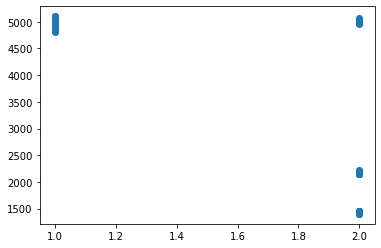

In [94]:

plt.figure()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(allLss, allCLsDs)
#ax.scatter(allNs, allNLsDs, allCLsDs)

In [6]:
combos = pd.DataFrame()
combos['s'] = allss
combos['C'] = allCs
combos['N'] = allNs
combos['L'] = allLs
combos['$L/s$'] = allLss
combos['$|C|/(L/s)^D$'] = allCLsDs
combos['$N/(L/s)^D$'] = allNLsDs
combos['MaxAngle'] = allMaxAngles
combos.MaxAngle.max()

0

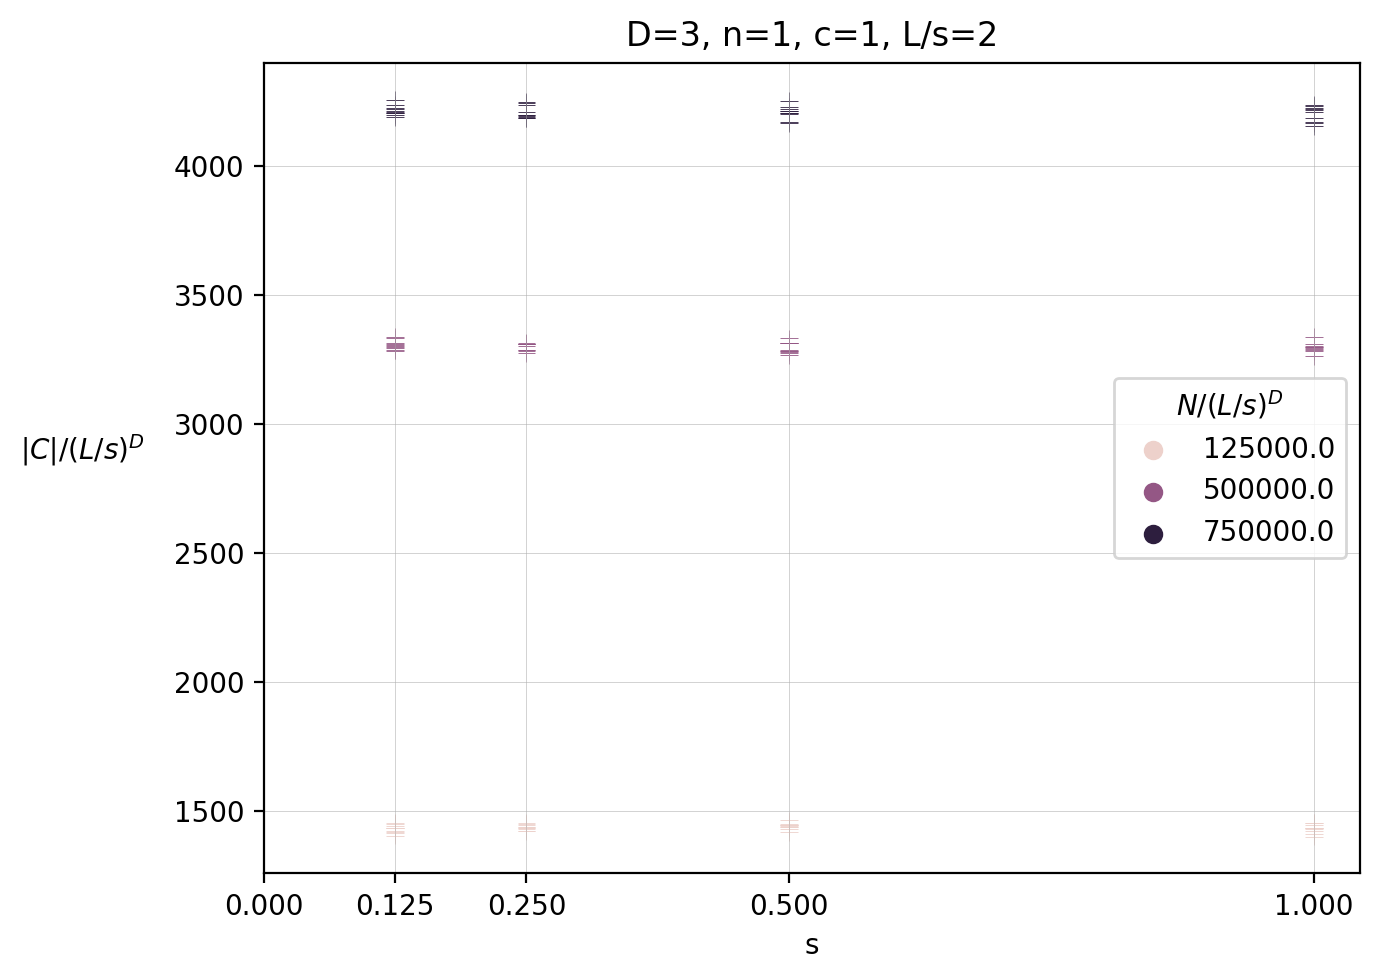

In [235]:
# settings 4, 6, 7 -- use all Ls's

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), dpi=200)
sns.scatterplot(
    data=combos, 
    x='s',y='$|C|/(L/s)^D$', hue='$N/(L/s)^D$',
    #hue_norm=(-0.1*combos.NLsD.max(), combos.NLsD.max()),
    s=40, edgecolor=None, linewidth=0.3, marker='+', alpha=1.0,
    ax=ax,
)
ax.set_xticks([0.0, 0.125, 0.25, 0.5, 1.0]);
ax.set_ylabel('$|C|/(L/s)^D$                   ', rotation=0);
ax.set_title('D=3, n=1, c=1, L/s=2')
ax.grid(True, linewidth=0.2);
fig.tight_layout();
fig.savefig('scaling-vary-s.png');
#ax.set(yscale="log");

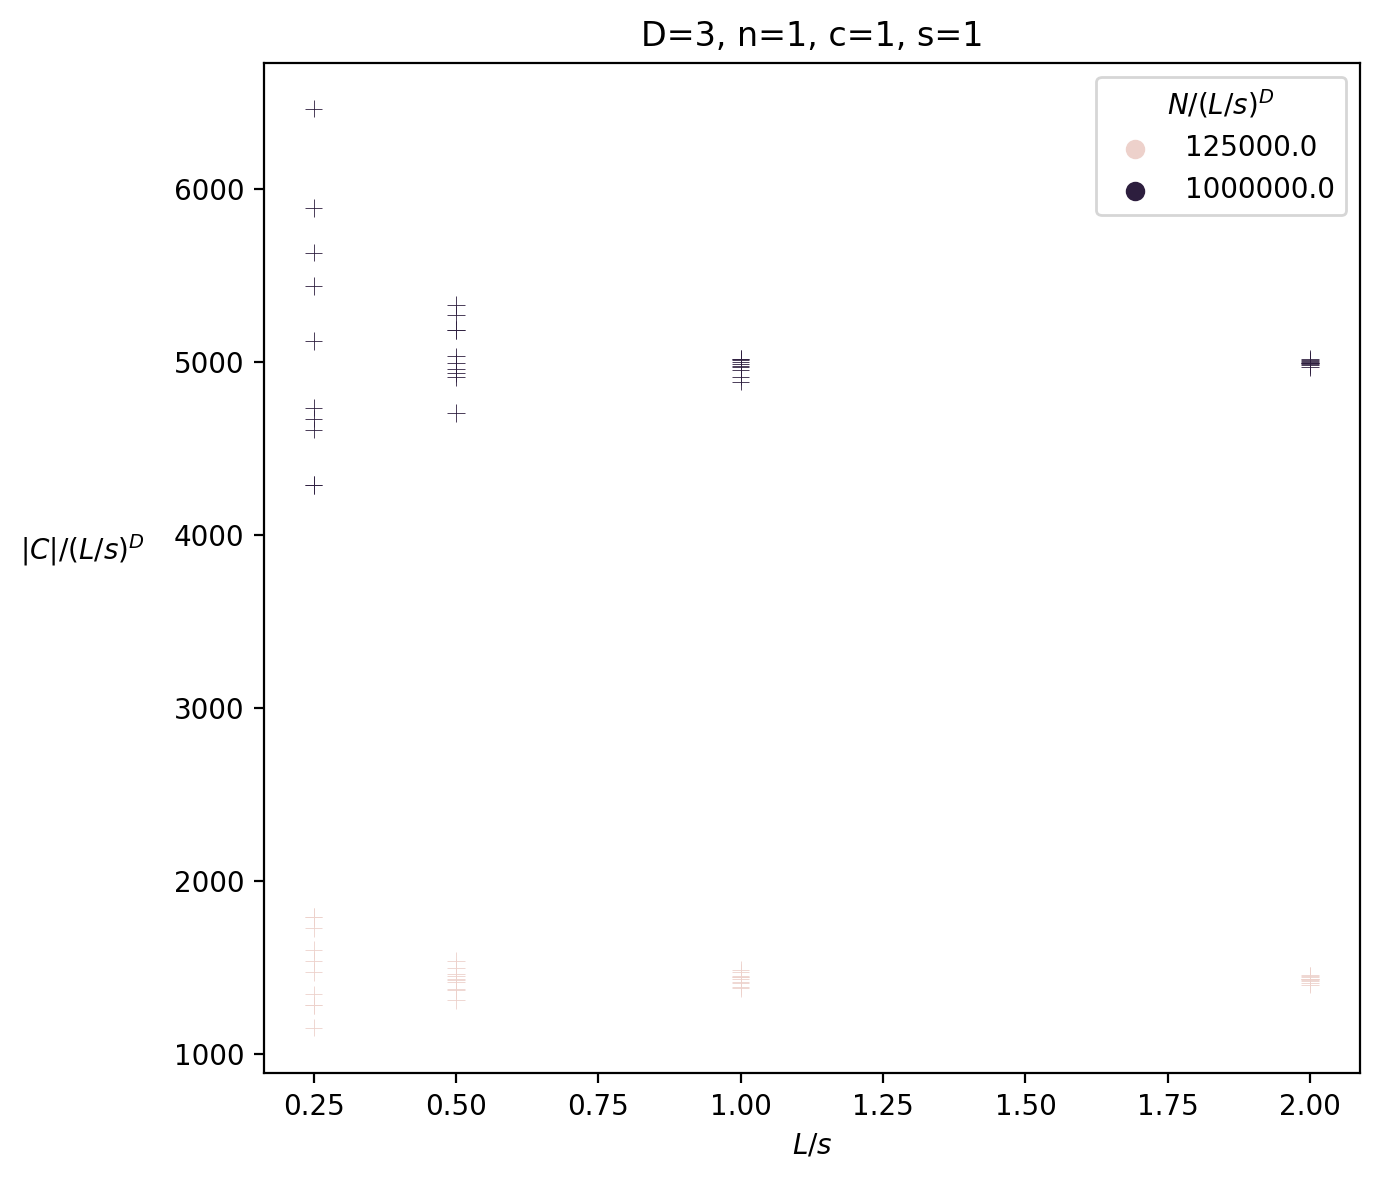

In [246]:
# settings 1, 2, 4, 8, 9, 10, 11, 12
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,6), dpi=200)
sns.scatterplot(
    data=combos, 
    x='$L/s$',y='$|C|/(L/s)^D$', hue='$N/(L/s)^D$', 
    #hue_norm=(-0.1*combos.NLsD.max(), combos.NLsD.max()),
    s=40, edgecolor=None, linewidth=0.3, marker='+', alpha=1.0,
    ax=ax,
)
#ax.set_xticks([0.0, 0.125, 0.25, 0.5, 1.0]);
ax.set_ylabel('$|C|/(L/s)^D$                   ', rotation=0);
ax.set_title('D=3, n=1, c=1, s=1')
fig.tight_layout();
fig.savefig('scaling-vary-Ls.png');

In [228]:
combos[combos['$L/s$'] == 1]

,s,C,N,L,$L/s$,$|C|/(L/s)^D$,$N/(L/s)^D$
0,1.000,5000,1000000.0,1.000,1.0,5000.0,1000000.0
1,1.000,5008,1000000.0,1.000,1.0,5008.0,1000000.0
2,1.000,4915,1000000.0,1.000,1.0,4915.0,1000000.0
3,1.000,4951,1000000.0,1.000,1.0,4951.0,1000000.0
4,1.000,4886,1000000.0,1.000,1.0,4886.0,1000000.0
5,1.000,5015,1000000.0,1.000,1.0,5015.0,1000000.0
6,1.000,5015,1000000.0,1.000,1.0,5015.0,1000000.0
7,1.000,4970,1000000.0,1.000,1.0,4970.0,1000000.0
8,1.000,4976,1000000.0,1.000,1.0,4976.0,1000000.0
9,1.000,4987,1000000.0,1.000,1.0,4987.0,1000000.0
